Importing Libraries and Loading Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/kirankumar/Downloads/retail_sales_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


Basic Data Exploration

In [3]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Unique values in categorical columns
print(df['Product Category'].unique())
print(df['Gender'].unique())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
['Beauty' 'Clothing' 'Electronics']
['Male' 'Female']


 Sales Trend Analysis

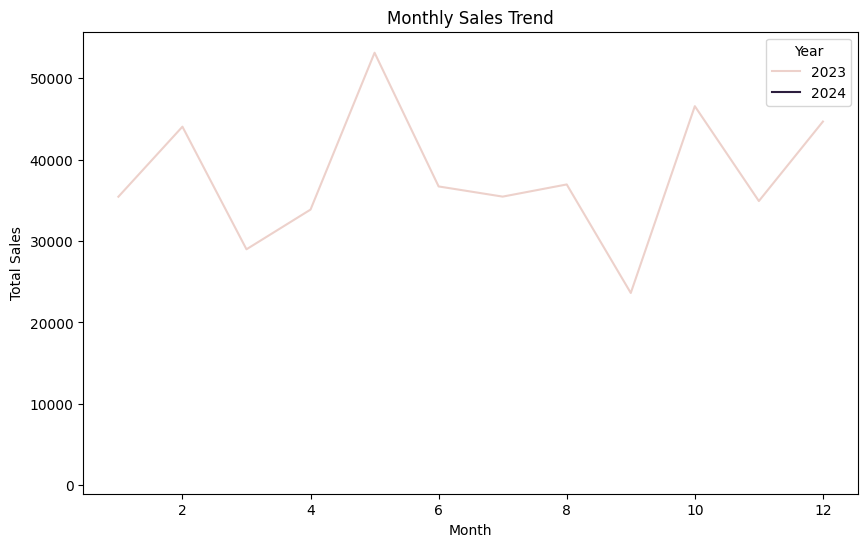

In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and year to see sales trends
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# Plot the sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total Amount', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Product Category Performance

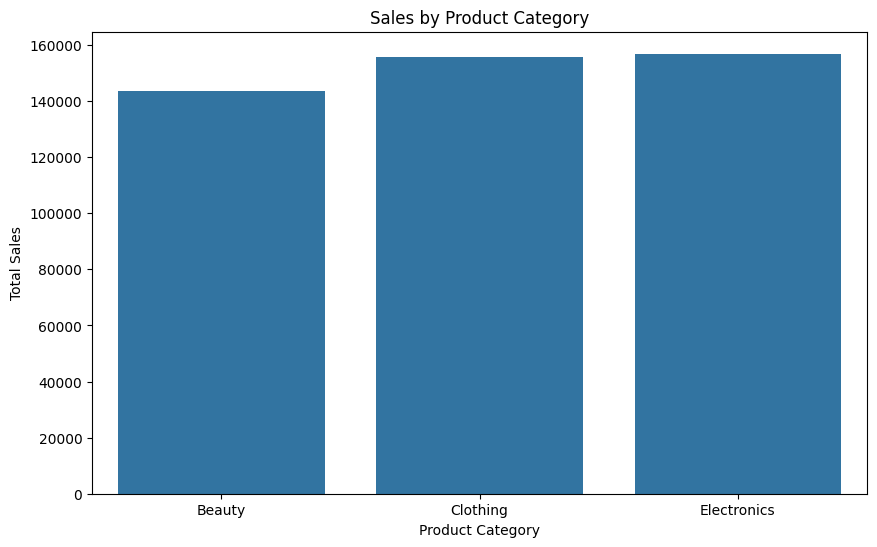

In [5]:
# Group by product category to see sales performance
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Plot the sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=category_sales)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

Customer Demographics Analysis

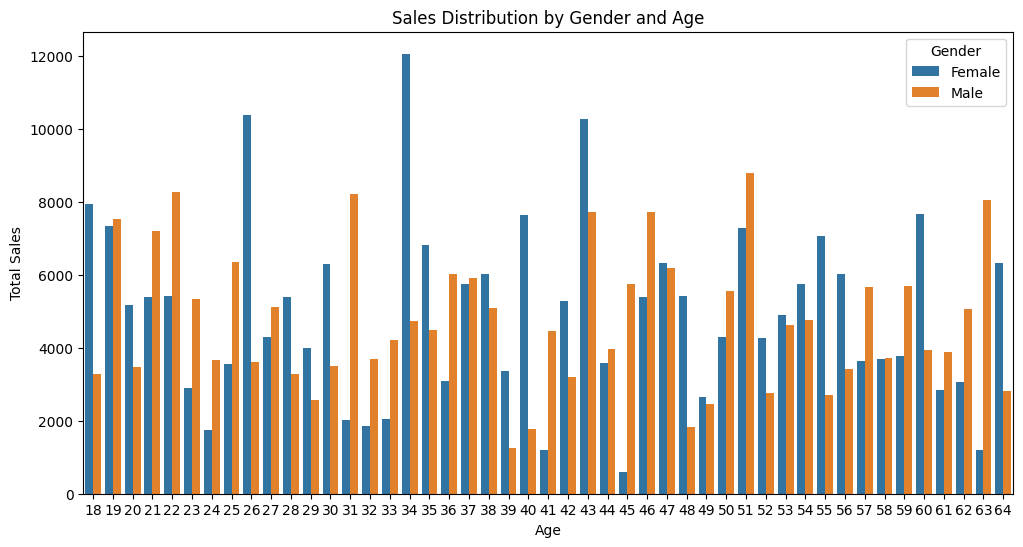

In [8]:
# Group by gender and age to see sales distribution
gender_age_sales = df.groupby(['Gender', 'Age'])['Total Amount'].sum().reset_index()

# Plot the sales distribution by gender and age
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Total Amount', hue='Gender', data=gender_age_sales)
plt.title('Sales Distribution by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.show()

Customer Segmentation by Purchase Behavior

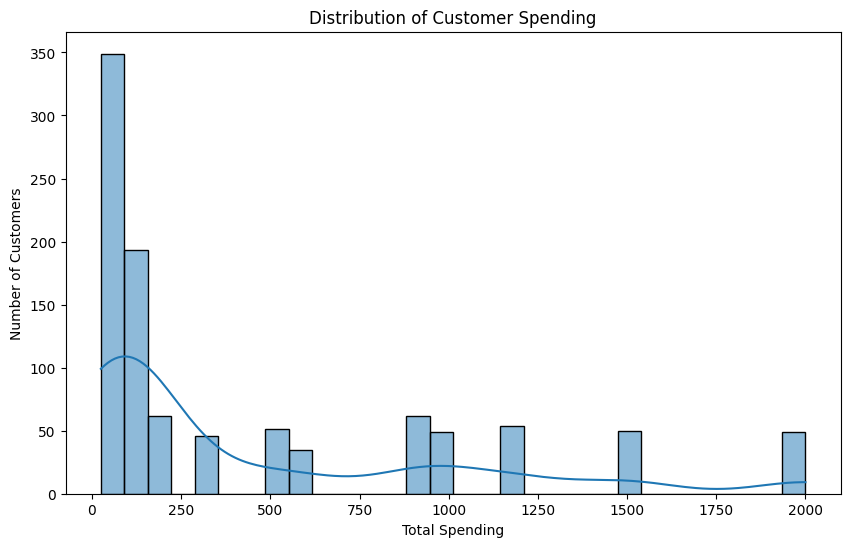

In [9]:
# Group by customer ID to see total spending per customer
customer_spending = df.groupby('Customer ID')['Total Amount'].sum().reset_index()

# Plot the distribution of customer spending
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending['Total Amount'], bins=30, kde=True)
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

Identifying High-Value Customers

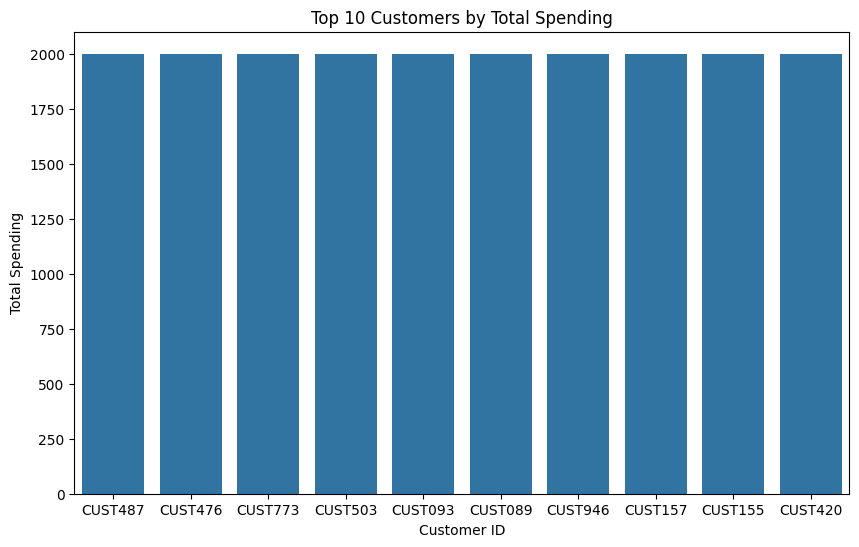

In [10]:
# Identify top 10 customers by total spending
top_customers = customer_spending.sort_values(by='Total Amount', ascending=False).head(10)

# Plot the top 10 customers
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer ID', y='Total Amount', data=top_customers)
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()

Correlation Analysis

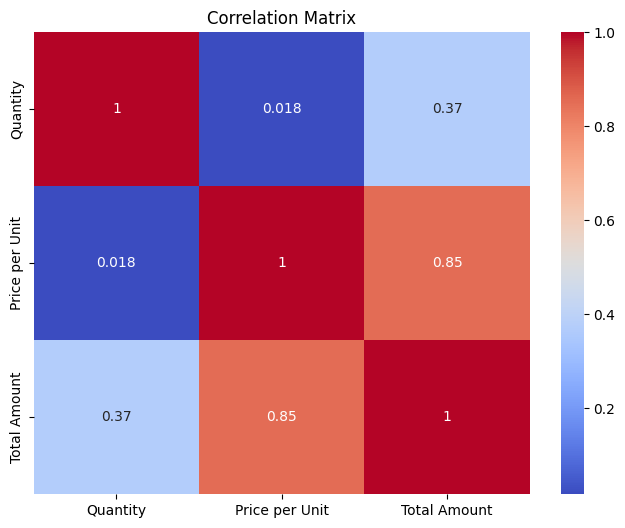

In [11]:
# Calculate correlation matrix
correlation_matrix = df[['Quantity', 'Price per Unit', 'Total Amount']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Identifying Underperforming Products

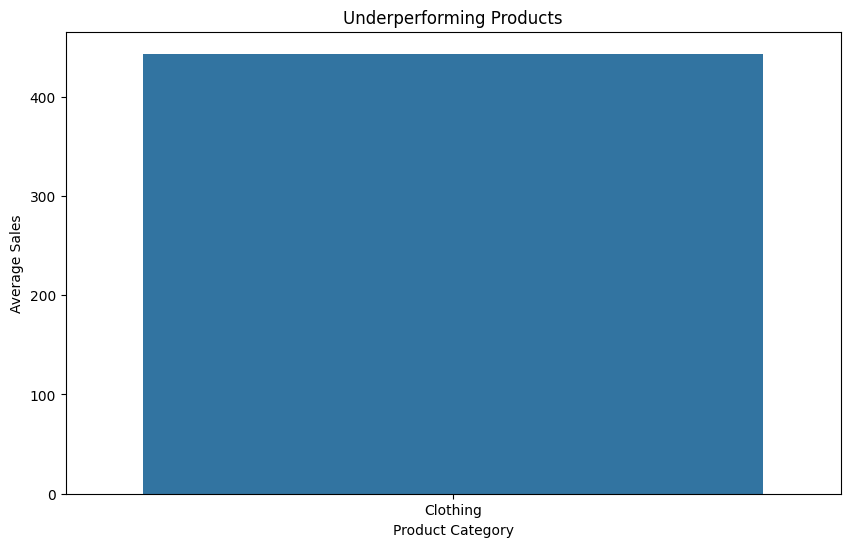

In [12]:
# Group by product category and calculate average sales per product
product_performance = df.groupby('Product Category')['Total Amount'].mean().reset_index()

# Identify underperforming products
underperforming_products = product_performance[product_performance['Total Amount'] < product_performance['Total Amount'].mean()]

# Plot underperforming products
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=underperforming_products)
plt.title('Underperforming Products')
plt.xlabel('Product Category')
plt.ylabel('Average Sales')
plt.show()

Customer Segmentation by Age

/var/folders/8m/2zmp021j0c162bshht22hkh80000gn/T/ipykernel_94387/1417225231.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()


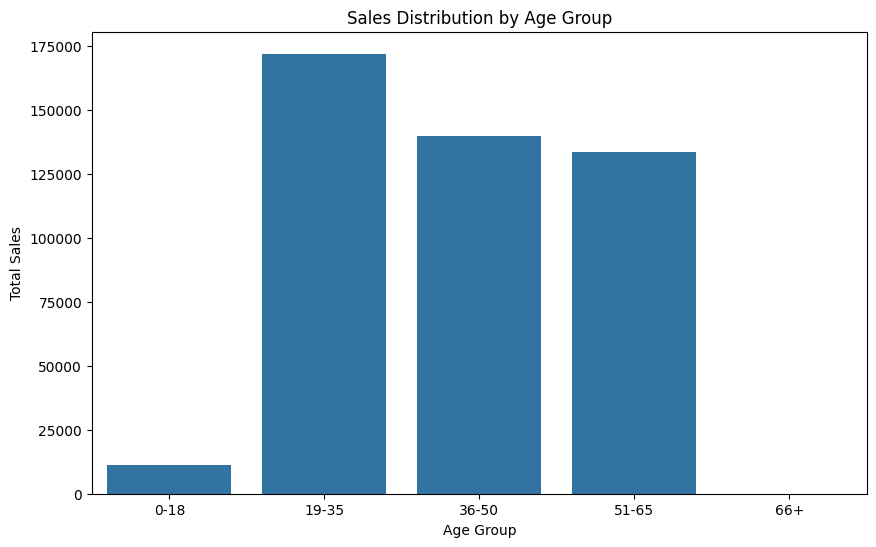

In [14]:
# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

# Group by age group to see sales distribution
age_group_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()

# Plot the sales distribution by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total Amount', data=age_group_sales)
plt.title('Sales Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

Customer Segmentation by Age Group, Gender, and Product Category

/var/folders/8m/2zmp021j0c162bshht22hkh80000gn/T/ipykernel_94387/1599077954.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_gender_category_sales = df.groupby(['Age Group', 'Gender', 'Product Category'])['Total Amount'].sum().reset_index()


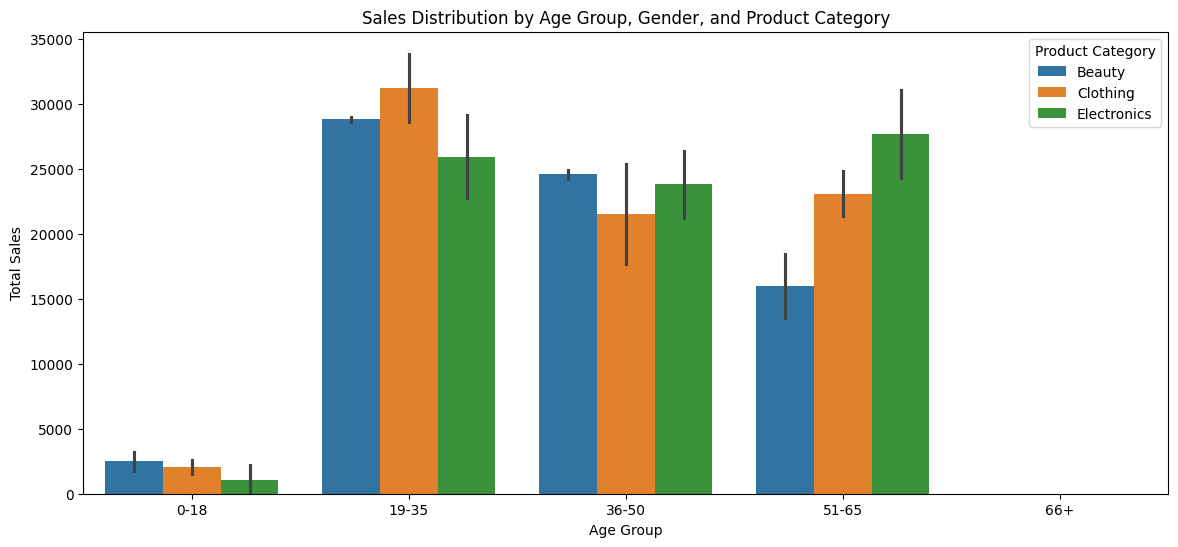

In [15]:
# Group by age group, gender, and product category to see sales distribution
age_group_gender_category_sales = df.groupby(['Age Group', 'Gender', 'Product Category'])['Total Amount'].sum().reset_index()

# Plot the sales distribution by age group, gender, and product category
plt.figure(figsize=(14, 6))
sns.barplot(x='Age Group', y='Total Amount', hue='Product Category', data=age_group_gender_category_sales)
plt.title('Sales Distribution by Age Group, Gender, and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()